In [77]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier

In [5]:
train = pd.read_csv('sephora_train_data.csv')
test = pd.read_csv('sephora_test_data.csv')
train.head()

,Unnamed: 0,product_url,overall_ratings,is_vegan,is_cruelty_free,award_wins,is_clean_product,has_clinical_results,has_alcohol,price,...,brand_bareMinerals,brand_belif,brand_fresh,brand_goop,brand_innisfree,brand_lilah b.,brand_philosophy,brand_rms beauty,brand_tarte,brand_trèStiQue
0,0,https://www.sephora.com/product/midnight-recov...,4.5,0,0,0,0,0,0,32.0,...,0,0,0,0,0,0,0,0,0,0
1,1,https://www.sephora.com/product/dermal-quench-...,4.0,0,1,0,0,1,0,98.0,...,0,0,0,0,0,0,0,0,0,0
2,2,https://www.sephora.com/product/caudalie-vinoc...,4.5,1,0,0,1,0,1,28.0,...,0,0,0,0,0,0,0,0,0,0
3,3,https://www.sephora.com/product/face-finishing...,4.5,0,0,0,0,0,1,75.0,...,0,0,0,0,0,0,0,0,0,0
4,4,https://www.sephora.com/product/ole-henriksen-...,4.0,0,1,0,1,1,1,38.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train['>4s'] = train['overall_ratings'].apply(lambda x: int(x>4))
test['>4s'] = test['overall_ratings'].apply(lambda x: int(x>4))

# Binary Binning

In [78]:
#### Creates the training set to train our regression model on
y_train_orig = train['>4s']
X_train_orig = train.drop(['>4s', 'overall_ratings', 'product_url', 'Unnamed: 0'], axis = 1)

Xtest = test.drop(['>4s', 'overall_ratings', 'product_url', 'Unnamed: 0'], axis = 1)
ytest = test['>4s']

X_train, X_test, y_train, y_test = train_test_split(X_train_orig, y_train_orig, test_size=0.3, random_state=404)
X_train.shape, X_test.shape

((658, 162), (282, 162))

In [79]:
grid_values = {'max_features': np.linspace(1,30,8, dtype='int32'),
               'max_depth': np.linspace(20,100,5, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [100, 250, 500, 750],
               'random_state': [404]}

rf2 = RandomForestClassifier() 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='accuracy', cv=5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 20,  40,  60,  80, 100]),
                         'max_features': array([ 1,  5,  9, 13, 17, 21, 25, 30]),
                         'min_samples_leaf': [5],
                         'n_estimators': [100, 250, 500, 750],
                         'random_state': [404]},
             scoring='accuracy')

(0.5, 0.6)

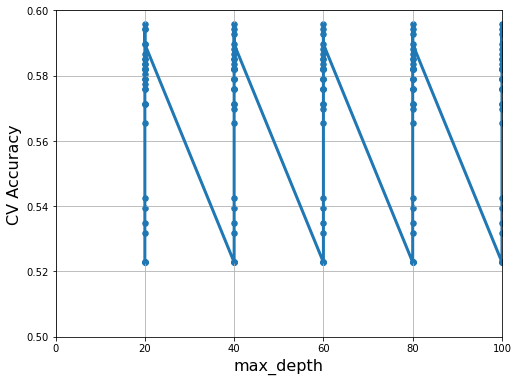

In [80]:
max_features = rf_cv.cv_results_['param_max_depth'].data
accuracy_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, accuracy_scores, s=30)
plt.plot(max_features, accuracy_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 100])
plt.ylim([0.5, 0.6])

Depth doesn't change the score from above.

(0.5, 0.6)

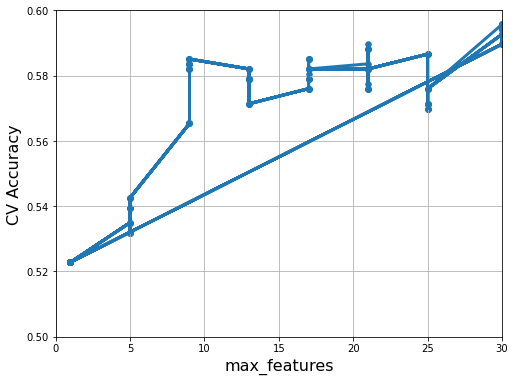

In [81]:
max_features = rf_cv.cv_results_['param_max_features'].data
accuracy_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, accuracy_scores, s=30)
plt.plot(max_features, accuracy_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([0, 30])
plt.ylim([0.5, 0.6])

Feature does change the score. 17 is the max.

(0.5, 0.6)

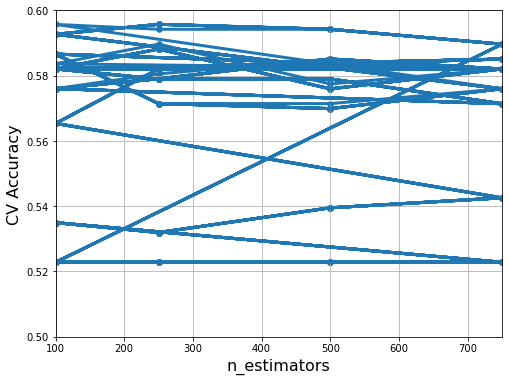

In [82]:
max_features = rf_cv.cv_results_['param_n_estimators'].data
accuracy_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('n_estimators', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, accuracy_scores, s=30)
plt.plot(max_features, accuracy_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([100, 750])
plt.ylim([0.5, 0.6])

Max is at 500 features.

In [83]:
grid_values = {'max_features': np.linspace(5,20,20, dtype='int32'),
               'max_depth': [20],
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [404]}

rf2 = RandomForestClassifier() 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='accuracy', cv=5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20],
                         'max_features': array([ 5,  5,  6,  7,  8,  8,  9, 10, 11, 12, 12, 13, 14, 15, 16, 16, 17,
       18, 19, 20]),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [404]},
             scoring='accuracy')

(0.5, 0.6)

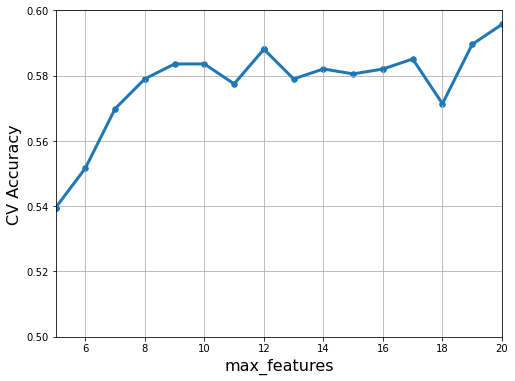

In [84]:
max_features = rf_cv.cv_results_['param_max_features'].data
accuracy_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, accuracy_scores, s=30)
plt.plot(max_features, accuracy_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([5, 20])
plt.ylim([0.5, 0.6])

In [85]:
rf = RandomForestClassifier(random_state = 404, n_estimators = 500, max_features = 12, max_depth = 20)
rf.fit(X_train_orig, y_train_orig)

RandomForestClassifier(max_depth=20, max_features=12, n_estimators=500,
                       random_state=404)

In [86]:
y_pred = rf.predict(Xtest)
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(ytest, y_pred))

Confusion Matrix: 
 [[62 57]
 [38 79]]

Accuracy: 0.597457627118644


# Binning according to rating (RF)